<a href="https://colab.research.google.com/github/Y07-assine/Car-Price-Prediction/blob/main/car_price_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Needed packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and processing

In [3]:
df = pd.read_csv('/content/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Checking the distrubition of categorical data

In [8]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [9]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [10]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

Encoding the categorical data

In [11]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


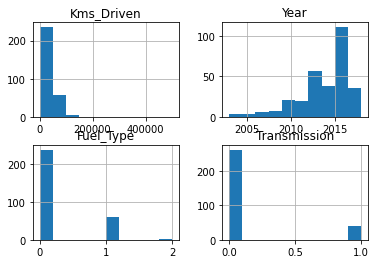

In [21]:
viz = df[['Kms_Driven','Year','Fuel_Type','Transmission']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the selling-price, to see how linear is their relation

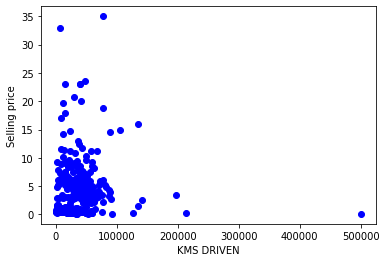

In [19]:
plt.scatter(df['Kms_Driven'],df['Selling_Price'],color='b')
plt.xlabel('KMS DRIVEN')
plt.ylabel('Selling price')
plt.show()

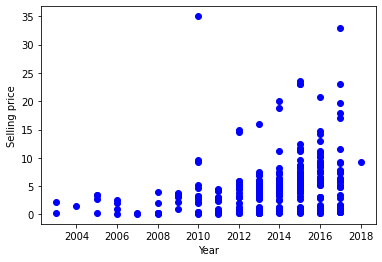

In [20]:
plt.scatter(df['Year'],df['Selling_Price'],color='b')
plt.xlabel('Year')
plt.ylabel('Selling price')
plt.show()

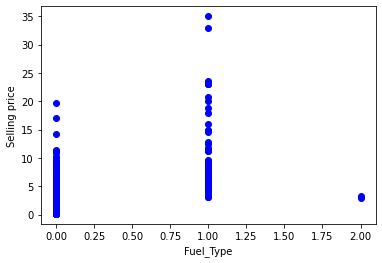

In [22]:
plt.scatter(df['Fuel_Type'],df['Selling_Price'],color='b')
plt.xlabel('Fuel_Type')
plt.ylabel('Selling price')
plt.show()

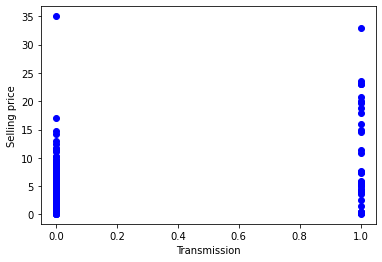

In [25]:
plt.scatter(df['Transmission'],df['Selling_Price'],color='b')
plt.xlabel('Transmission')
plt.ylabel('Selling price')
plt.show()

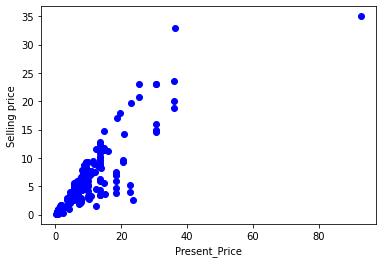

In [26]:
plt.scatter(df['Present_Price'],df['Selling_Price'],color='b')
plt.xlabel('Present_Price')
plt.ylabel('Selling price')
plt.show()

Creating train and test  dataset

In [27]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [28]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

**Model Training**

1. Linear regression

In [29]:
lin_reg_model = LinearRegression()

In [30]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model evaluation

In [32]:
training_data_prediction = lin_reg_model.predict(X_train)


There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
*  R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).



In [34]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_train - training_data_prediction)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Y_train - training_data_prediction) ** 2))
print("R2-score: %.2f" % r2_score(Y_train , training_data_prediction) )

Mean absolute error: 1.20
Residual sum of squares (MSE): 3.21
R2-score: 0.88


Visualize the original prices and predicted prices

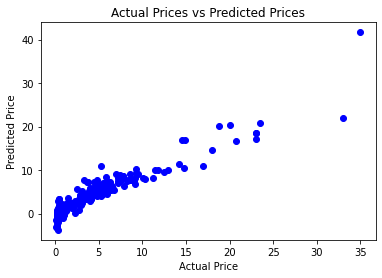

In [37]:
plt.scatter(Y_train,training_data_prediction,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [38]:
test_data_prediction = lin_reg_model.predict(X_test)

In [39]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_test - test_data_prediction)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Y_test - test_data_prediction) ** 2))
print("R2-score: %.2f" % r2_score(Y_test , test_data_prediction) )

Mean absolute error: 1.27
Residual sum of squares (MSE): 2.94
R2-score: 0.84
